
# Waffle Charts, Word Clouds, and Regression Plots

## Objetivos

Después de terminar este lab seras capas de:

*   Crear Word cloud y Waffle charts
*   Crear regression plots con la librería Seaborn

## Tabla de contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Explorar Datasets con *p*andas](#0)<br>
2.  [Descargar y preparar información](#2)<br>
3.  [Visualcategory_category_category_category_category_indexndexndexndexndexzar información usando Matplotlib](#4) <br>
4.  [Waffle Charts](#6) <br>
5.  [Word Clouds](#8) <br>
6.  [Regression Plots](#10) <br>

</div>


# Explorando Dataset con *pandas* y Matplotlib<a id="0"></a>

Herramientas: El curso depende fuertemente de [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) y [*Numpy*](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) para el arreglo de datos, análisis y visualización. La librería principal con la que usaremos para gráficar en este curso sera [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Inmigración a Canada desde 1980 hasta 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) de las pagina de las Naciones Unidas

El dataset contiene información anual en el flujo internacional de migrantes registrados por los países de destino. La información presenta los flujos de entrada y salida de acuerdo al lugar de nacimiento, ciudadanía o lugar previo/ siguiente residencia para extranjeros como nacionales. En este lab, nos enfocaremos en la información de Inmigración de Canada.

# Descargando y preparando la información<a id="2"></a>


Lo Primero que hacemos es instalar **openpyxl** (anteriormente **xlrd**), un módulo que requiere *pandas* para leer archivos Excel.

Importamos los módulos primarios Import Primary Modules:

In [2]:
import numpy as np
import pandas as pd
from PIL import Image # Convierte imágenes en arreglos

Descarga el dataset de la inmigración de Canada y léelo en un dataframe de *pandas*.

In [3]:
import urllib.request
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = urllib.request.urlopen(URL)

if resp.getcode() == 200:
    content = resp.read()
    df_can = pd.read_excel(io.BytesIO(content),
                           sheet_name='Canada by Citizenship',
                           skiprows=range(20),
                           skipfooter=2)
    print('Data downloaded and read into a dataframe!')
else:
    print("Error al descargar el archivo")


Data downloaded and read into a dataframe!


Veamos los primeros cinco elementos de nuestro dataset.

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Veamos cuantas entradas tiene nuestro dataset

In [5]:
df_can.shape

(195, 43)

Limpiemos la información. Haremos algunas modificaciones al dataset original para hacer mas fácil la creación de nuestras visualizaciones. Referencia a *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* para una descripción mas detallada del proceso.


In [6]:
# Limpiamos el dataset para remover las columnas innecesarias como (e.j. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# Renombraremos las columnas para que tengan sentido.
df_can.rename(columns={"OdName":"Country","AreaName":"Continent","RegName":"Region"},inplace=True)

# Por el bien de la consistencia, haremos que todas las columnas sean de tipo string
df_can.columns = list(map(str,df_can.columns))

# Establece el nombre del país como indice - Util para una búsqueda rápida usando el método .loc
df_can.set_index("Country", inplace=True)

# Agrega la columna Total
df_can["Total"]= df_can.iloc[:,4:].sum(axis=1)

# Crearemos una lista con nombre years que sera usada a lo largo de este lab
years = list(map(int,range(1980,2013)))
print("data dimension", df_can.shape)

data dimension (195, 38)


# Visualizando información usando Matplotlib<a id="4"></a>


Importando y preparando `matplotlib`:

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #necesario para hacer gráficos de waffles

mpl.style.use("ggplot") 

# Revisando la versión de matplotlib
print("Versión de Matplotlib", mpl.__version__)

Versión de Matplotlib 3.7.2


# Waffle Charts <a id="6"></a>

Un `waffle chart` es una visualización interesante que normalmente es creada para mostrar un progreso hacia una meta. Es comúnmente una opción efectiva cuando intentas agregar caracteristicas visuales interesantes a una visual que consiste principalmente de celdas.

Revisemos nuevamente el caso de estudio anterior acerca de Dinamarca, Noruega y Suecia.

In [8]:
# Vamos a crear un nuevo dataframe para estos tres países.
df_dsn= df_can.loc[["Denmark","Norway","Sweden"],:]

# Revisemos como luce el dataframe.
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3629
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2211
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5585


Desafortunadamente, A diferencia de R, los gráficos de 'waffle' no están integrados en ninguna de las bibliotecas de visualización de Python. Por lo tanto, aprenderemos a crearlos desde cero.

**Paso 1.** El primer paso para crear un waffle chart es determinar la proporción de cada categoría con respecto al total.

In [9]:
# Calcula la proporción de cada categoría con respecto al total.

total_values= df_dsn["Total"].sum()
category_proportions= df_dsn["Total"] / total_values

# Imprime las proporciones
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.317637
Norway,0.193523
Sweden,0.488840


**Paso 2.** El segundo paso es definir el tamaño total del `waffle` chart.


In [10]:
width= 40 # Ancho del gráfico.
height = 10 # Alto del gráfico.

total_num_tiles = width * height

print(f"Total number of tiles is {total_num_tiles}")

Total number of tiles is 400


**Paso 3.** El tercer paso es usar la proporción de cada categoría para  determinar el numero respectivo de cuadrados

In [11]:
# Procesa el numero de cuadrado por categoría.
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# Imprime el numero de cuadrados por categoría.
pd.DataFrame({"Number of tile": tiles_per_category})

,Number of tile
Country,
Denmark,127
Norway,77
Sweden,196


Basado en las proporciones calculadas, Dinamarca ocupa129 cuadrados del `waffle` char, Noruega ocupara 77 cuadrados, y Suecia ocupara 194 espacios.

**Paso 4** El cuarto paso es crear una matrix que refleje el `waffle chart` y llenarlo.


In [12]:
# Inicializamos el waffle chart y lo dejamos vacío.
waffle_chart = np.zeros((height, width), dtype=np.uint)

# define los indices para hacer un loop a traves del waffle chart.
category_index = 0
title_index = 0

# Rellenar el waffle chart.
for col in range(width):
    for row in range(height):
        title_index += 1

        # Si el numero de cuadrados rellenado es igual que la categoría actual colocar los cuadrados
        if title_index> sum(tiles_per_category[0:category_index]):
            # Proceder a la siguiente categoría.
            category_index += 1

        # Ajustar el valor de la clase a tipo integer, el cual incrementa con la clase.
        waffle_chart[row,col]= category_index

print("Waffle chart populated!")

Waffle chart populated!


Veamos como luce la matrix.

In [13]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Como era de esperar, la matrix consiste en tres categorías y el numero total de cada instancia de esa categoría se ajusta al numero total de cuadrados de cada categoría

**Paso 5** Mapea la matrix del `waffle chart` en una visual.

<Figure size 640x480 with 0 Axes>

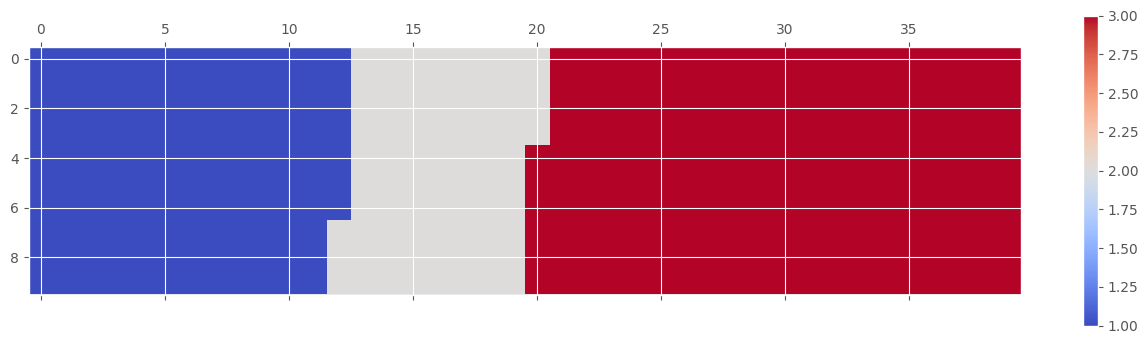

In [14]:
# Instancia un objeto nueva figura.
fig = plt.figure()

# usa matshow para mostrar el waffle chart.
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Paso 6.** Embellecer el gráfico.

<Figure size 640x480 with 0 Axes>

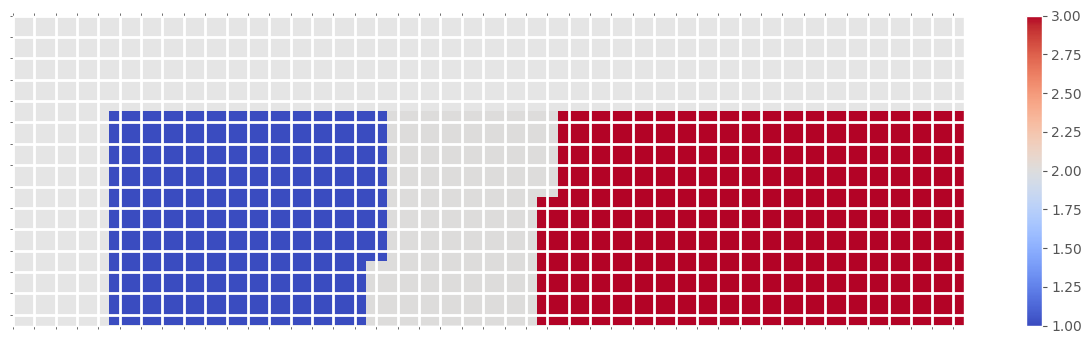

In [15]:
# Instancia un nuevo objeto figura.
fig = plt.figure()

# usa matshow para mostrar el gráfico.
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

# Obten el eje
ax = plt.gca()

# Establece las marcas mas pequeñas.
ax.set_xticks(np.arange(-5,(width),1), minor=True)
ax.set_yticks(np.arange(-5,(height),1), minor=True)

# Agrega una cuadricula basada en las marcas mas pequeñas
ax.grid(which="minor",color="w",linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Paso 7** Crear las leyendas y agregarlas al gráfico.

In [16]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Y ahí lo tienes un lindo y delicioso `waffle chart`, no lo crees?

Ahora seria muy ineficiente repetir esos siete pasos cada vez que queramos crear un `waffle chart`. asi que vamos a combinar los siete pasos en una sola función llamada *create_waffle_chart*. Esta función tomara los siguientes parámetros:

> 1.  **categories**: Categorías o Clases únicas en el dataframe.
> 2.  **values**: Valores correspondientes a categorías o clases.
> 3.  **height**: Definir el alto del `waffle chart`.
> 4.  **width**: Definir el ancho del `waffle chart`.
> 5.  **colormap**: La clase Colormap
> 6.  **value_sign**: Con el fin de hacer nuestra función más generalizable, añadiremos este parámetro para abordar los signos que podrían estar asociados con un valor, como %, $, y así sucesivamente. **value_sign** tiene un valor predeterminado de cadena vacía..


In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    # Procesa las porciones de cada categoría con su respectivo total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # Procesa el número de cuadrados por categorías.
    total_num_tiles = width * height  # Número total de cuadrados

    # Procesa el número de cuadrados por cada categoría
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # Inicializa el gráfico de waffle como una matriz vacía.
    waffle_chart = np.zeros((height, width))

    # Define los índices para hacer un loop a través del waffle chart.
    category_index = 0
    title_index = 0

    # Rellena el waffle chart.
    for col in range(width):
        for row in range(height):
            title_index += 1

            # Si el número de cuadrados es igual, rellenos es igual a la cantidad correspondiente a los cuadrados reservados
            if title_index > sum(tiles_per_category[0:category_index]):
                # Procede a la siguiente categoría.
                category_index += 1

            # Establece los valores de la clase a tipo integer, el cual incrementa con la clase.
            waffle_chart[row, col] = category_index

    # Instancia un nuevo objeto figura.
    fig = plt.figure()

    # Usa matshow para mostrar el waffle chart.
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # Obtén el eje.
    ax = plt.gca()

    # Establece los recuadros mínimos.
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # Agrega cuadrículas basado en los cuadrados menores.
    ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # Procesa la suma acumulativa de las categorías individuales para hacer coincidir la paleta de colores entre el gráfico y la leyenda.
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # Crea las leyendas.
    legend_handles = []
    for category_index, category in enumerate(categories):
        if value_sign == '%':
            label_str = f"{category} ({values[category_index]:.1f}{value_sign})"
        else:
            label_str = f"{category} ({value_sign}{values[category_index]:.1f})"

        color_val = colormap(float(values_cumsum[category_index]) / total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # Agrega la leyenda al gráfico.
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0.0, -0.2, 0.95, .1)
    )


Ahora a crear el `waffle chart`, todo los que tenemos que hacer es llamar la función `create_waffle_chart`. Vamos a definir el ingreso de los parámetros.

In [18]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Ahora vamos a llamar la función para crear el `waffle chart`.

<Figure size 640x480 with 0 Axes>

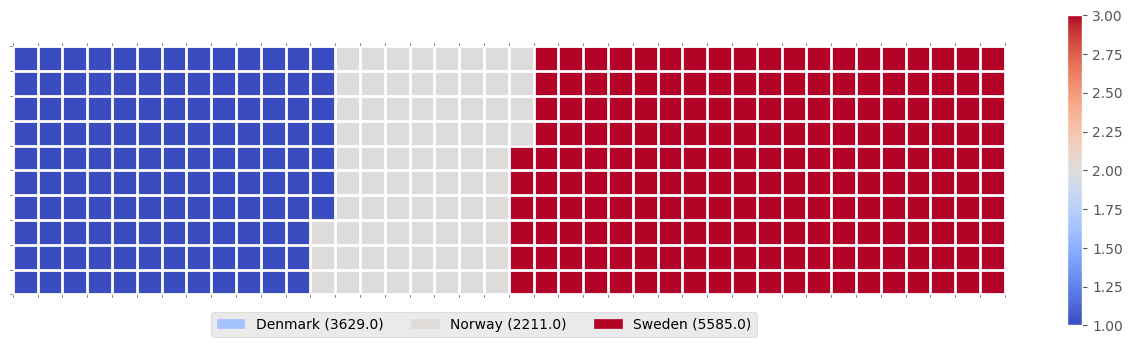

In [19]:
create_waffle_chart(categories,values,height, width,colormap)

Parece ser que hay un nuevo paquete de Python para generar `waffle charts` llamado [PyWaffle](https://github.com/ligyxy/PyWaffle), pero al parecer el repositorio aún se esta armando. Pero siéntete libre de revisarlo y jugar con el.


# Word Clouds <a id="8"></a>

#### <p style="color: red">Por favor sáltate esta sección</p>
#### Actualmente estamos trabajando en la compatibilidad con `wordcloud`.
#### Por ahora, descarga este notebook y corre lo de manera local mediante`jupyterlab`.

`Word` clouds (también conocido comotext clouds o tag clouds) trabaja de manera simple: entre mas aparesca una palabra en especifico dentro de un texto (tales como un discurso, blog post o database), la palabra sera mas grande y marcada dentro del the word cloud.


Afortunadamente, existe un paquete de Python para generar un `word` clouds. El paquete se llama `word_cloud` fue desarrollado por **Andreas Mueller**. Puedes aprender mas acerca del paquete en el siguiente [link](https://github.com/amueller/word_cloud/).

Vamos a usar este paquete para aprender a como generar un word cloud para algún texto en especifico.


Primero instalaremos el paquete.

In [20]:
#pip install wordcloud

# Importamos el paquete y preparamos stopwords

from wordcloud import STOPWORDS, WordCloud

print("Wordcloud is installed and imported!")

Wordcloud is installed and imported!


`Word` es usado comúnmente para realizar análisis de alto nivel y visualizaciones de un texto. En consecuencia, vamos a desviarnos del dataset de inmigración y trabajaremos con un ejemplo que implique analizar un texto. Tratemos de analizar una pequeña novela escrita por **Lewis Carroll**  titulada *Alicia en el país de las Maravillas*. Vallamos y descarguemos el archivo *.txt* de la novela.

In [21]:
import urllib

# abre el archivo y leelo de una variable llamada alice_novel

alice_novel = urllib.request.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt").read().decode("utf-8")

Siguiente, usaremos stopwords el cual importamos de`word_cloud`. Usaremos la función *set* para remover cualquier stopwords redundante.


In [22]:
stopwords= set(STOPWORDS)

Creamos un objeto word cloud y generamos un word cloud. Para mayor simpleza, vamos a generar un word cloud usando solo las primeras 2000 palabras de la novela.

In [23]:
# Instanciamos el objeto word cloud
alice_wc = WordCloud(
    background_color = "white",
    max_words = 2000,
    stopwords = stopwords
)

# genera el word cloud
alice_wc.generate(alice_novel)

Increíble ahora que word cloud esta creado lo visualizaremos.

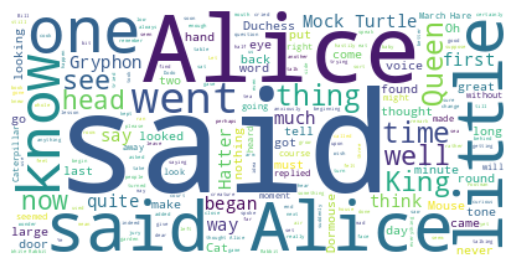

In [24]:
# Mostrando el word cloud.
plt. imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Interesante! en las primeras 2000 palabras de la novel, las palabras mas comunes son **Alice**, **said**, **little**, **Queen**, y asi sucesivamente. vamos a arreglar el tamaño de la nube para que asi podamos ver las palabras que tiene menos frecuencia.

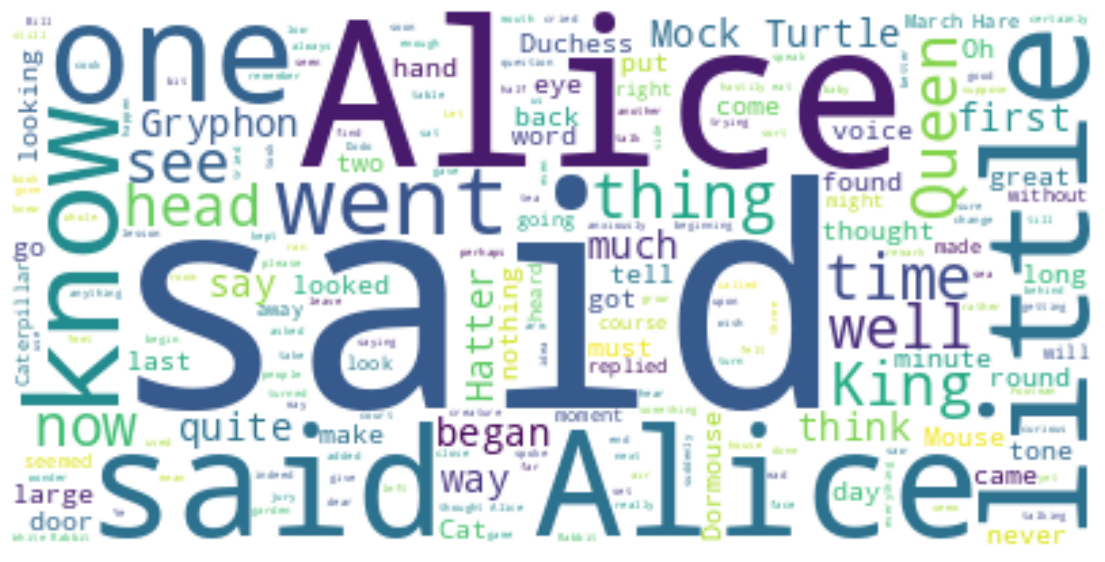

In [25]:
fig = plt.figure(figsize=(14,18))

# Muestra la nube
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Mucho mejor! aun que, **said** no es realmente una palabra informativa. Así que agreguemos la a nuestro stopwords y re-generemos nuestro cloud.

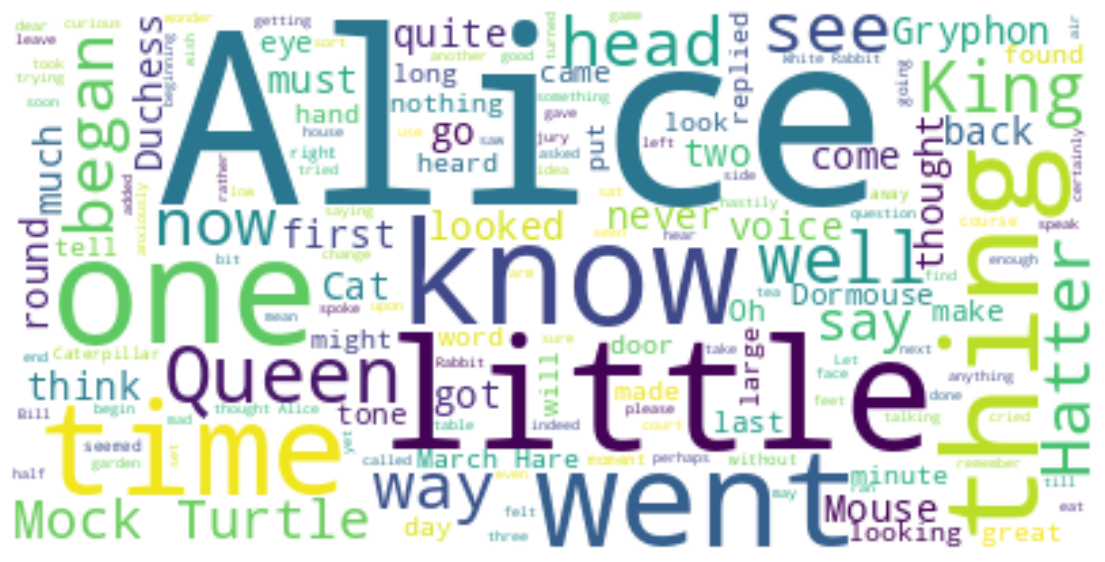

In [26]:
stopwords.add("said") # Agregamos la palabra said a stopwords.

# Re-generamos el word cloud.
alice_wc.generate(alice_novel)


# Desplegamos nuestro cloud.
fig = plt.figure(figsize=(14,18))

plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

¡Genial! Para superponer las palabras en forma de máscara sobre una imagen, sigue estos pasos:

Descarga la máscara: Asegúrate de tener la imagen de la máscara en tu directorio de trabajo con el nombre "alice_mask.png".

Carga la imagen de la máscara: Utiliza matplotlib para cargar la imagen de la máscara:

In [27]:
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

Veamos como se ve la mascara.

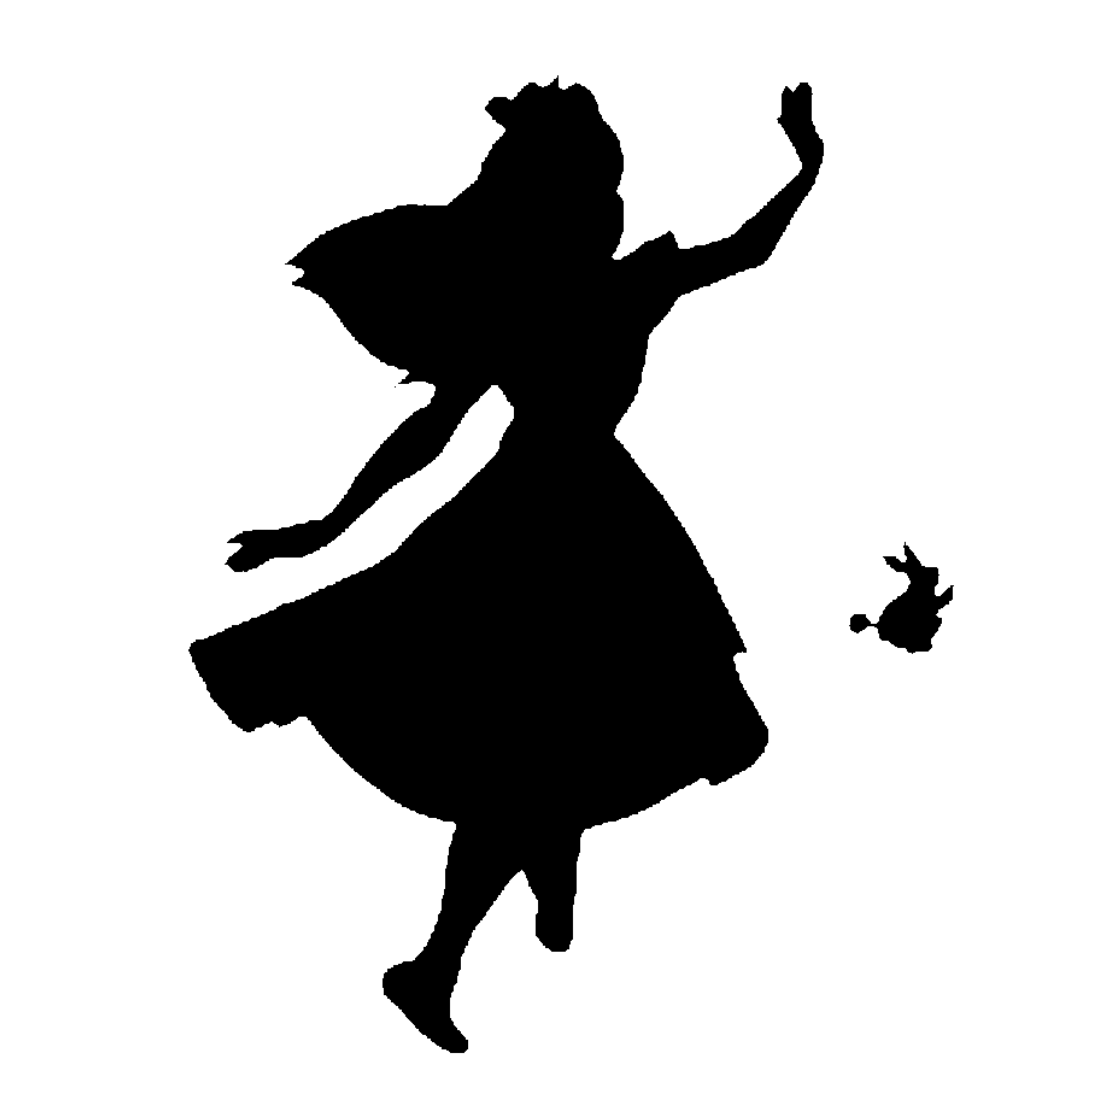

In [28]:
fig = plt.figure(figsize=(14,18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

Moldearemos el word cloud de acuerdo a la mascara usando el paquete `word_cloud`. Para mayor simplicidad continuaremos usando las primeras 2000 palabras de la novela.

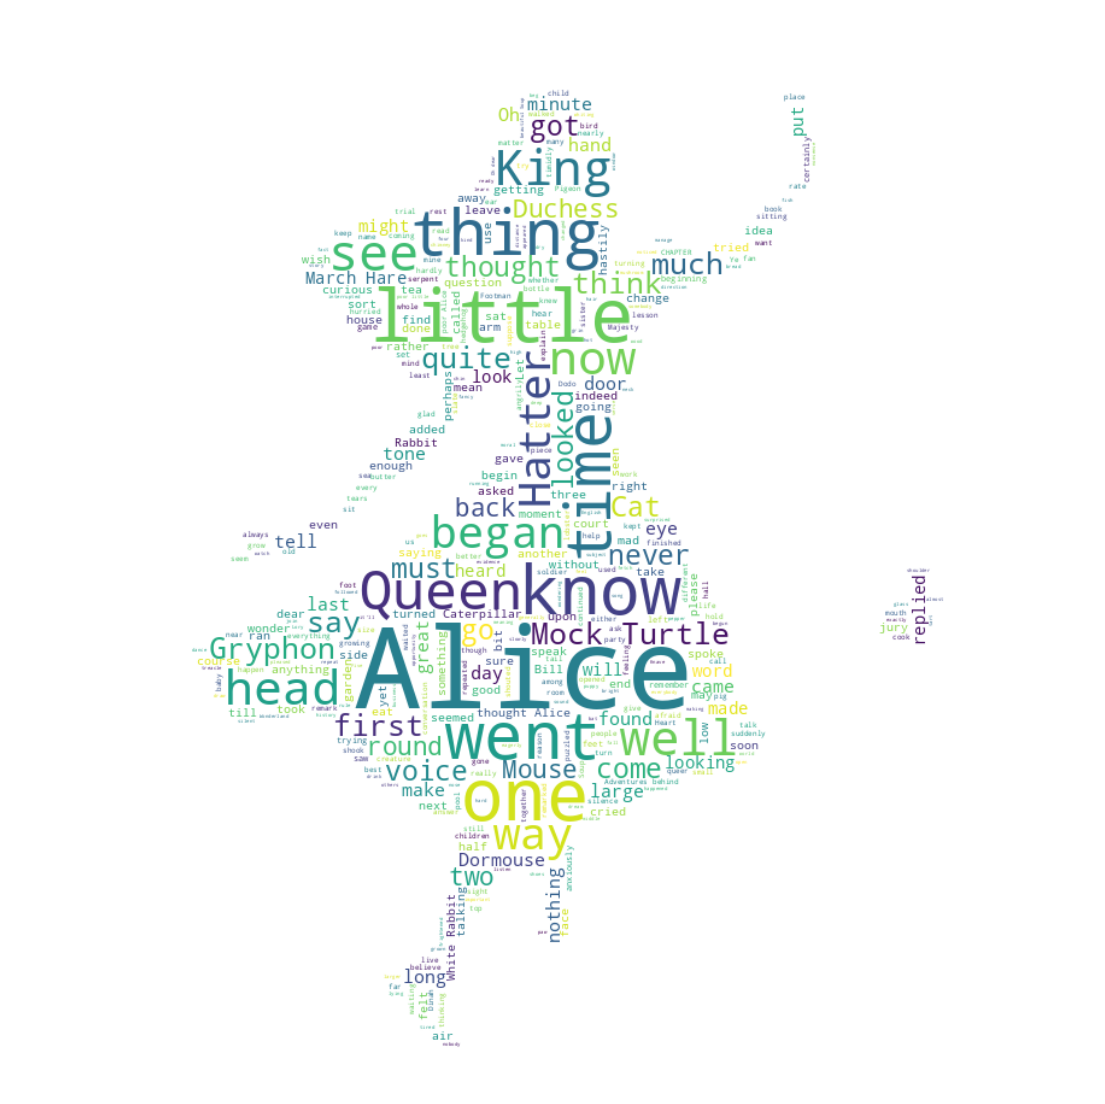

In [29]:
# instanciamos el objeto word cloud.
alice_wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, stopwords=stopwords)

# Generamos el word cloud
alice_wc.generate(alice_novel)

# Desplegamos el word cloud
fig= plt.figure(figsize=(14,18))

plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Impresionante, desafortunadamente nuestra información de la inmigración no tiene texto, pero donde hay una voluntad siempre habrá un camino. Vamos a generar un texto de muestra de nuestro dataset de inmigración, datos de texto de 90 palabras.


In [30]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Y cual era el total de inmigración desde 1980 a 2013?

In [31]:
total_immigration = df_can["Total"].sum()

total_immigration

6310016

Usando el nombre de paises de una sola palabra, vamos a duplicar cada nombre de país basado en cuanto ellos contribuyen al total de la inmigración.

In [32]:
max_words = 90
words_string = ""
for country in df_can.index.values:
    # Revisamos si el nombre de los países es una palabra simple
    repeat_num_times = int(df_can.loc[country,"Total"]/ total_immigration * max_words)
    words_string = words_string + ((country + " ")* repeat_num_times)

# desplegamos el texto generado
words_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Iran (Islamic Republic of) Iran (Islamic Republic of) Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Republic of Korea Republic of Korea Romania Sri Lanka Sri Lanka United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United States of America United States of America United States of America Viet Nam '

Acá no estamos tratando con ninguna stopwords, asi que no hay necesidad de crearlas

In [33]:
# Creamos el word cloud
wordcloud = WordCloud(background_color="white").generate(words_string)

print("Word cloud created!")

Word cloud created!


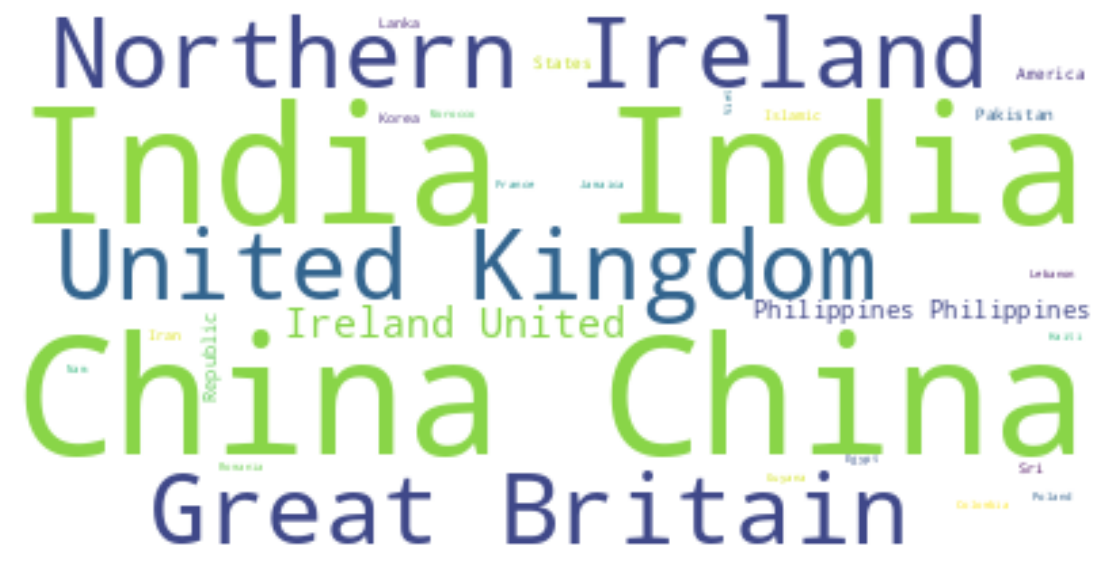

In [34]:
# Mostramos el word cloud.

plt.figure(figsize=(14,18))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Regression Plots <a id="10"></a>

> Seaborn es una librearia de visualización de Python basada en matplotlib. Provee una interface de alto nivel para dibujar atractivos gráficos de estadísticas. Puedes aprender mas acerca de  *seaborn* en el siguiente [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) y mas acerca de *seaborn* regression plots al seguir el siguiente [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).
